# The Heisenberg Model (3D Spins)

In [1]:
include("../src/heisenberg.jl")
import CairoMakie as cm
import LsqFit as lsq
using JLD2
using ProgressMeter
import StatsBase as sb
import Distributions as dist

## Task 1: find the critical temperature
Todo: fit susceptibility with a bell curve to get the peak position ($T_c$)

Progress: 100%|█████████████████████████████████████████| Time: 0:04:03


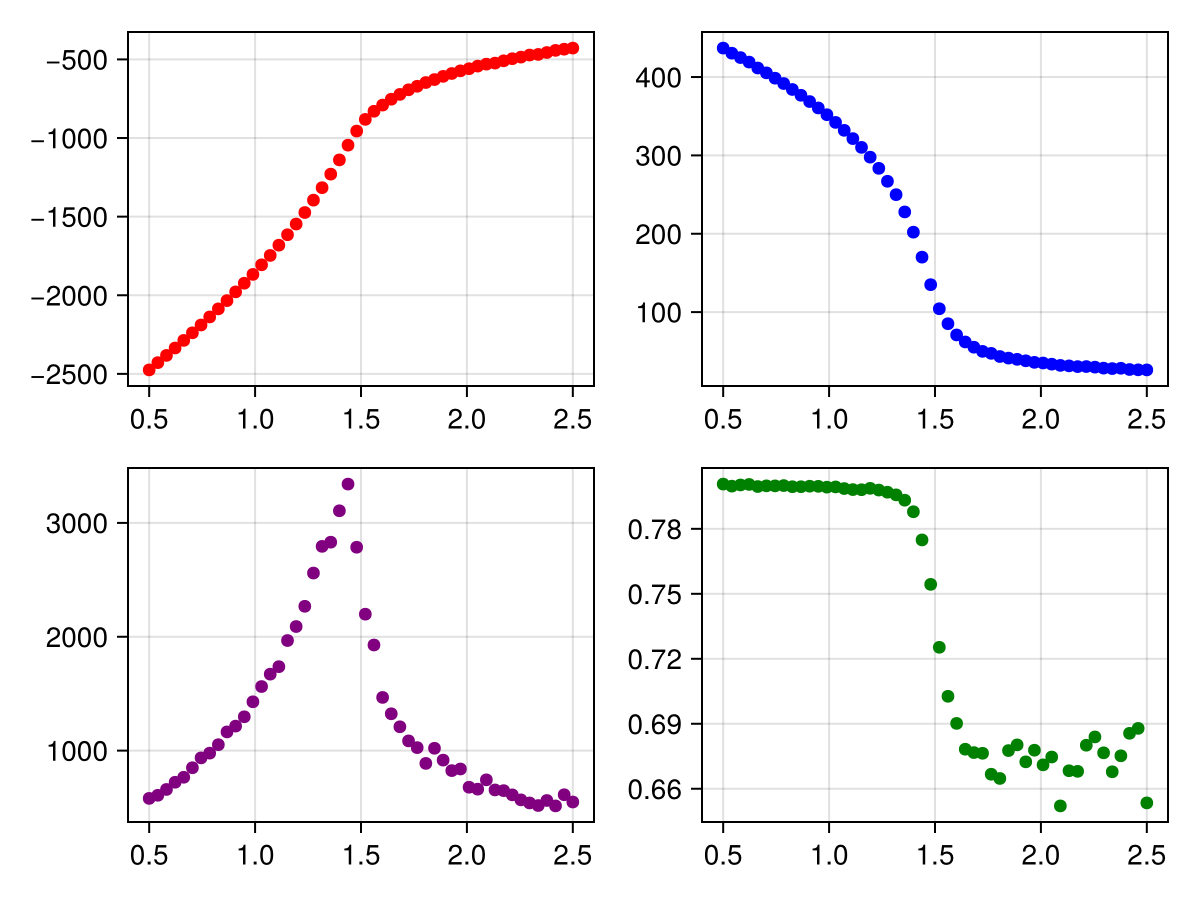

In [2]:
# using Wolff
temps, energies, magnetisations, binder_cumulants = temp_sweep(grid_size=10,T_min=0.5,T_max=2.5, T_Steps=50,mc_algo=wolff_step, N_Subsweep=10)
fig = cm.Figure()
cm.plot(fig[1, 1], temps, energies[1], color=:red, label="Energy")
cm.plot(fig[1, 2], temps, magnetisations[1], color=:blue, label="Magnetisation")
cm.plot(fig[2, 1], temps, energies[2].^2 ./temps, color=:purple, label="Susceptibility")
cm.plot(fig[2, 2], temps, binder_cumulants, color=:green, label="Binder Cumulant")
fig

Progress: 100%|█████████████████████████████████████████| Time: 0:03:15


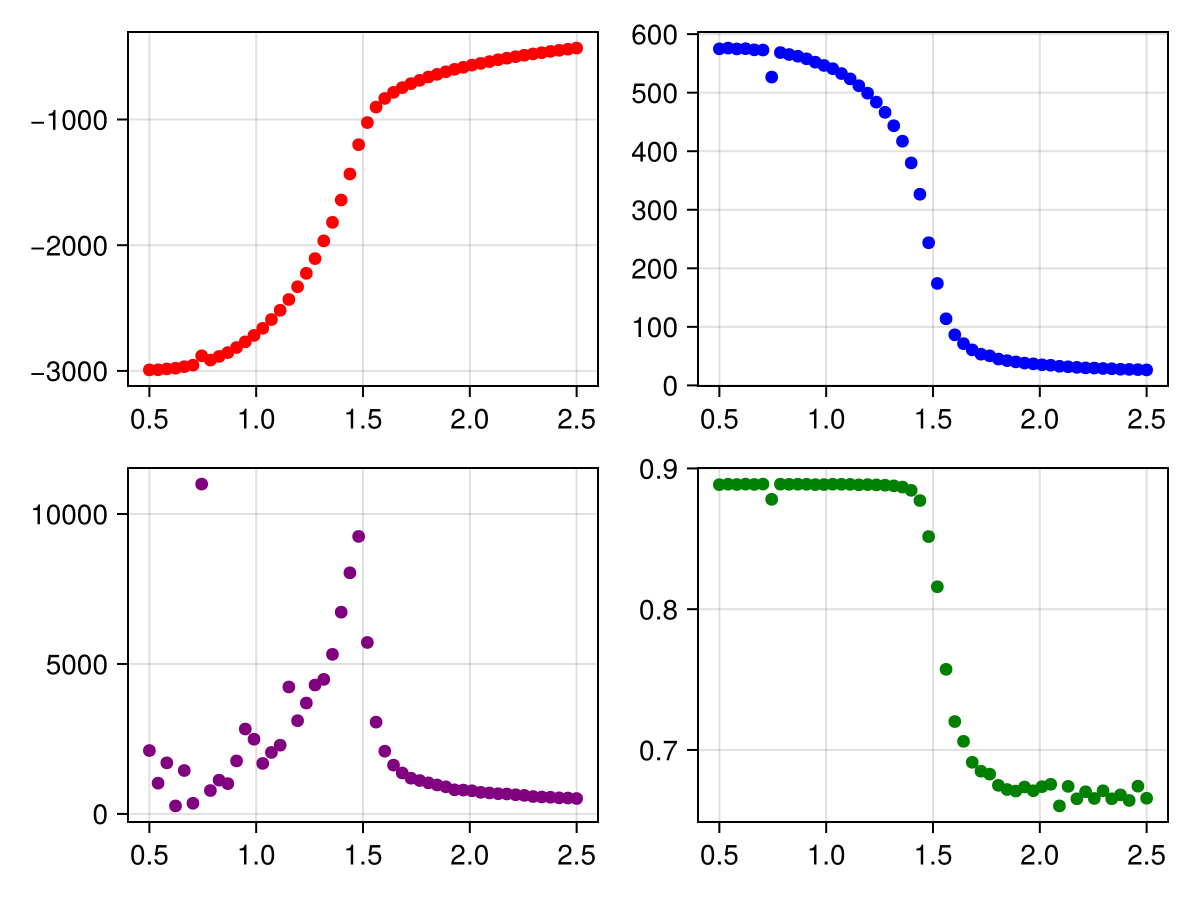

In [3]:
# using metropolis
temps, energies, magnetisations, binder_cumulants = temp_sweep(grid_size=10,T_min=0.5,T_max=2.5, T_Steps=50,mc_algo=metropolis_step)
fig = cm.Figure()
cm.plot(fig[1, 1], temps, energies[1], color=:red, label="Energy")
cm.plot(fig[1, 2], temps, magnetisations[1], color=:blue, label="Magnetisation")
cm.plot(fig[2, 1], temps, energies[2].^2 ./temps, color=:purple, label="Susceptibility")
cm.plot(fig[2, 2], temps, binder_cumulants, color=:green, label="Binder Cumulant")
fig

## Task 2: Autocorrelation time and it's critical exponent

In [4]:
function measure_grid_ensemble(; grid_sizes::Array{Int,1}, J::Float64=1.0, T::Float64=0.0, N_Sample::Int=10_000, N_Subsweep::Int=3_000, mc_algo::Function=metropolis_step)
    energies, magnetisations = Array{Array{Float64,1},1}(undef, length(grid_sizes)), Array{Array{Float64,1},1}(undef, length(grid_sizes))
    @showprogress Threads.@threads for (i, grid_size) in collect(enumerate(grid_sizes))
        grid = thermalize_grid(grid_size=grid_size, J=J, T=T, N=N_Subsweep*grid_size^3, mc_algo=mc_algo)
        energies_, magnetisations_ = sample_grid(grid, T=T, J=J, N_Subsweep=N_Subsweep, N_Sample=N_Sample, mc_algo=mc_algo)
        energies[i] = energies_
        magnetisations[i] = mean(magnetisations_)
    end
    return energies, magnetisations
end

measure_grid_ensemble (generic function with 1 method)

In [5]:
Tc = 1.443
grid_sizes = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24];

In [6]:
acm_energy, acm_mag = measure_grid_ensemble(grid_sizes=grid_sizes, T=Tc, mc_algo=metropolis_step,N_Sample=50_000)

Progress: 100%|█████████████████████████████████████████| Time: 0:06:35


([[-1246.666666666663, -1341.3333333333298, -1297.3333333333298, -1270.666666666663, -1353.3333333333298, -1403.9999999999966, -1425.3333333333298, -1417.3333333333298, -1386.666666666663, -1398.666666666663  …  -1529.3333333333428, -1517.3333333333428, -1498.666666666676, -1493.3333333333428, -1480.0000000000093, -1462.666666666676, -1548.0000000000095, -1480.0000000000095, -1561.333333333343, -1610.6666666666763], [-2007.6666666666476, -1960.999999999981, -1950.3333333333142, -1960.999999999981, -1990.3333333333142, -2000.999999999981, -1875.6666666666476, -1850.3333333333144, -1830.3333333333144, -1872.9999999999811  …  -1770.3333333332962, -1810.3333333332962, -1680.999999999963, -1731.6666666666295, -1774.3333333332962, -1826.3333333332962, -1879.6666666666295, -1858.3333333332962, -1827.6666666666295, -1858.3333333332962], [-2449.3333333333317, -2462.666666666665, -2387.9999999999986, -2357.333333333332, -2410.6666666666656, -2405.333333333332, -2361.333333333332, -2358.666666666

In [7]:
i=15

15

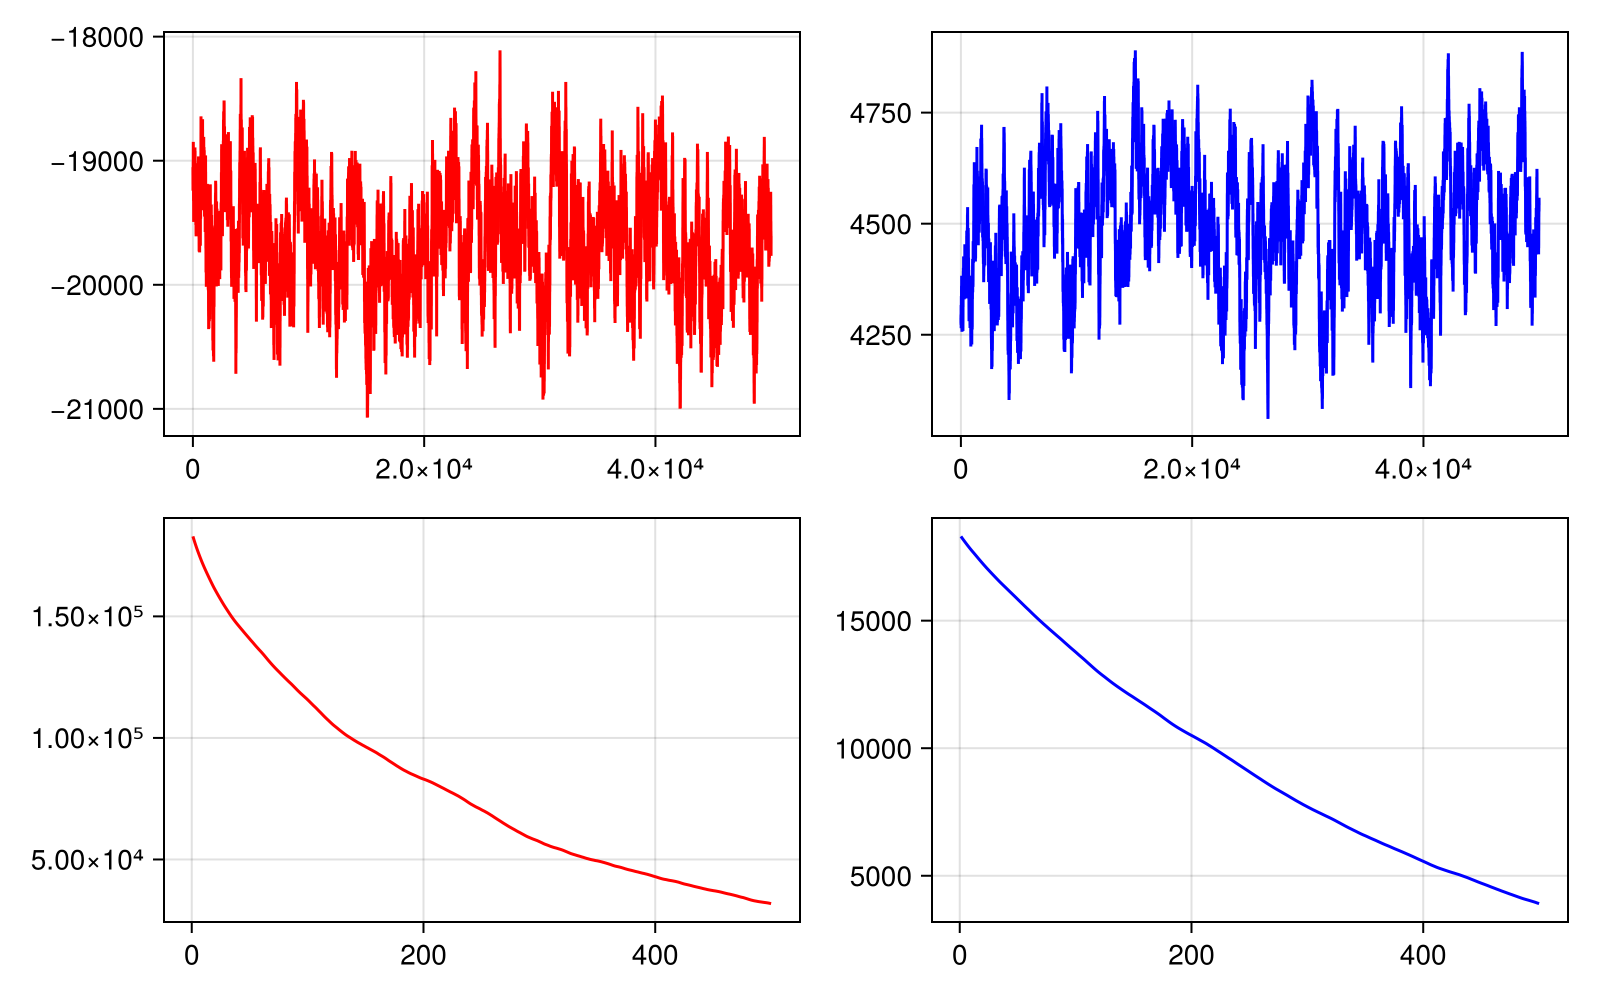

In [8]:
fig = cm.Figure(size=(800, 500))
cm.lines(fig[1, 1], acm_energy[i], color=:red, label="Energy")
cm.lines(fig[1, 2], acm_mag[i], color=:blue, label="Magnetisation")
cm.lines(fig[2, 1], autocorr(acm_energy[i],max_lag=500), color=:red, label="Energy")
cm.lines(fig[2, 2], autocorr(acm_mag[i],max_lag=500), color=:blue, label="Magnetisation")
fig

In [9]:
get_ac_time(autocorr(acm_energy[i],max_lag=500)), get_ac_time(autocorr(acm_mag[i],max_lag=500))

(130.95430490581305, 147.93835974583897)

In [10]:
acw_energy, acw_mag = measure_grid_ensemble(grid_sizes=grid_sizes, T=Tc, mc_algo=wolff_step,N_Sample=100_000, N_Subsweep=1)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:13


([[-1098.023280998462, -1140.076221455304, -1140.938251993257, -1107.5228422428243, -1107.2424845617354, -1086.253115412069, -1079.4862038890303, -1102.5673863354114, -1116.8892153626352, -1117.379412966579  …  -1064.0321665636889, -1073.100367016831, -1120.2881391851147, -1115.151330684573, -1114.9462031441374, -1078.0717780527993, -1074.5801274405846, -1073.6772052422398, -1074.116008889937, -1075.813257479081], [-1540.7640359103593, -1541.2512850263106, -1504.4556216259052, -1529.784337566437, -1528.5961917060517, -1516.1484479752871, -1511.003875587148, -1524.1438775546128, -1521.7109140874334, -1519.8123256518545  …  -1440.523296309575, -1439.7330187460723, -1429.7944022862, -1435.290259877096, -1430.9265851110788, -1429.6272420867945, -1421.649596389288, -1410.398297740441, -1409.406550779496, -1406.4230973395313], [-1689.5891755772252, -1688.9050035983958, -1689.808942790292, -1713.103807166303, -1712.259392142055, -1712.190410853361, -1728.4065539056767, -1718.4315215921322, -1

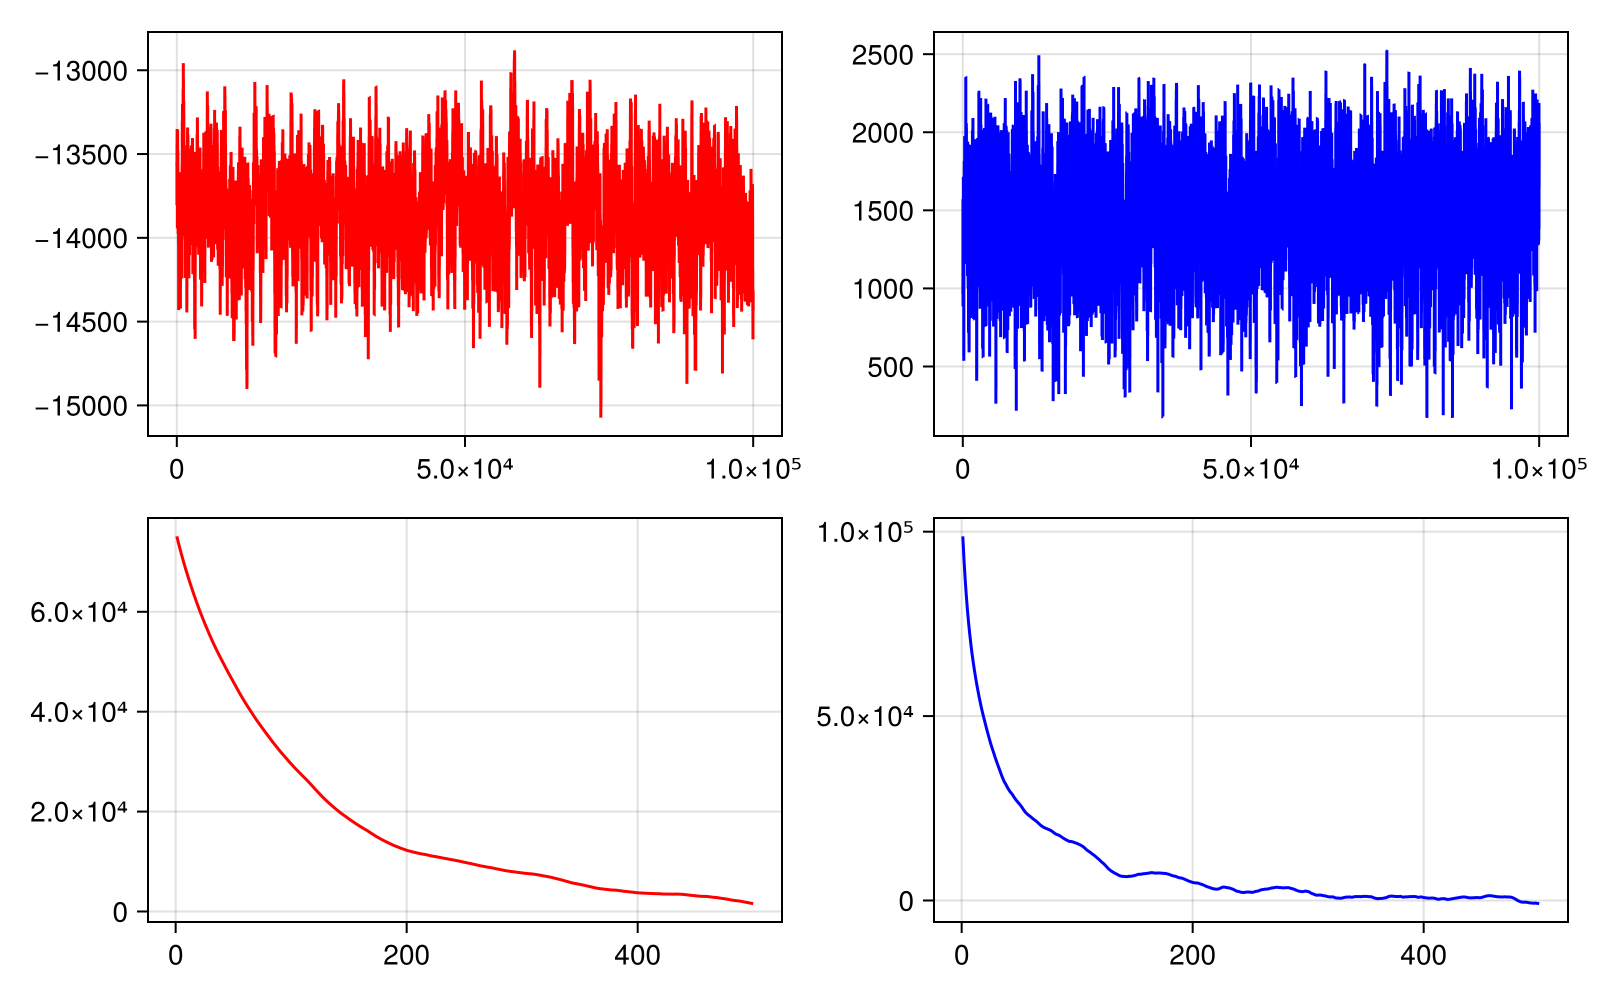

In [11]:
fig = cm.Figure(size=(800, 500))
cm.lines(fig[1, 1], acw_energy[i], color=:red, label="Energy")
cm.lines(fig[1, 2], acw_mag[i], color=:blue, label="Magnetisation")
cm.lines(fig[2, 1], autocorr(acw_energy[i],max_lag=500), color=:red, label="Energy")
cm.lines(fig[2, 2], autocorr(acw_mag[i],max_lag=500), color=:blue, label="Magnetisation")
fig

### gather autocorrelation times

In [12]:
function ac_grids(; grid_sizes::Array{Int,1}, energies::Array{Array{Float64,1},1}, magnetisations:: Array{Array{Float64,1},1},max_lag::Int=50)
    ac_times = Array{Float64,1}(undef, length(grid_sizes))
    for (i, grid_size) in enumerate(grid_sizes)
        e_ac = get_ac_time(autocorr(energies[i],max_lag=max_lag))
        m_ac = get_ac_time(autocorr(magnetisations[i],max_lag=max_lag))
        ac_times[i] = mean([e_ac, m_ac])
    end
    return ac_times
end

ac_grids (generic function with 1 method)

In [13]:
m_times = ac_grids(grid_sizes=grid_sizes, energies=acm_energy, magnetisations=acm_mag, max_lag=200)

15-element Vector{Float64}:
 18.633640253584787
 18.77169089575846
 19.2690711178291
 20.69447795595133
 22.115861014016932
 23.42308078677648
 22.603559377480572
 26.09462166639974
 25.325297609093887
 25.658376811785697
 24.70762262032926
 24.095969021161157
 26.70289740940857
 24.347638520090463
 24.49312337601848

In [14]:
w_times = ac_grids(grid_sizes=grid_sizes, energies=acw_energy, magnetisations=acw_mag, max_lag=200)

15-element Vector{Float64}:
 19.15769829811631
 20.022696617070586
 19.695782450317832
 20.17826622407415
 21.42095348678505
 22.315845256885066
 21.254771067521933
 21.98542081123744
 21.73137834167239
 21.70827185011012
 22.820704446954277
 22.12530116195135
 21.666703232060918
 21.436215774963763
 23.170131568950303

[0.38655735539297337, 2.0525446866027157]
[0.1660566427830363, 2.5962821718627205]


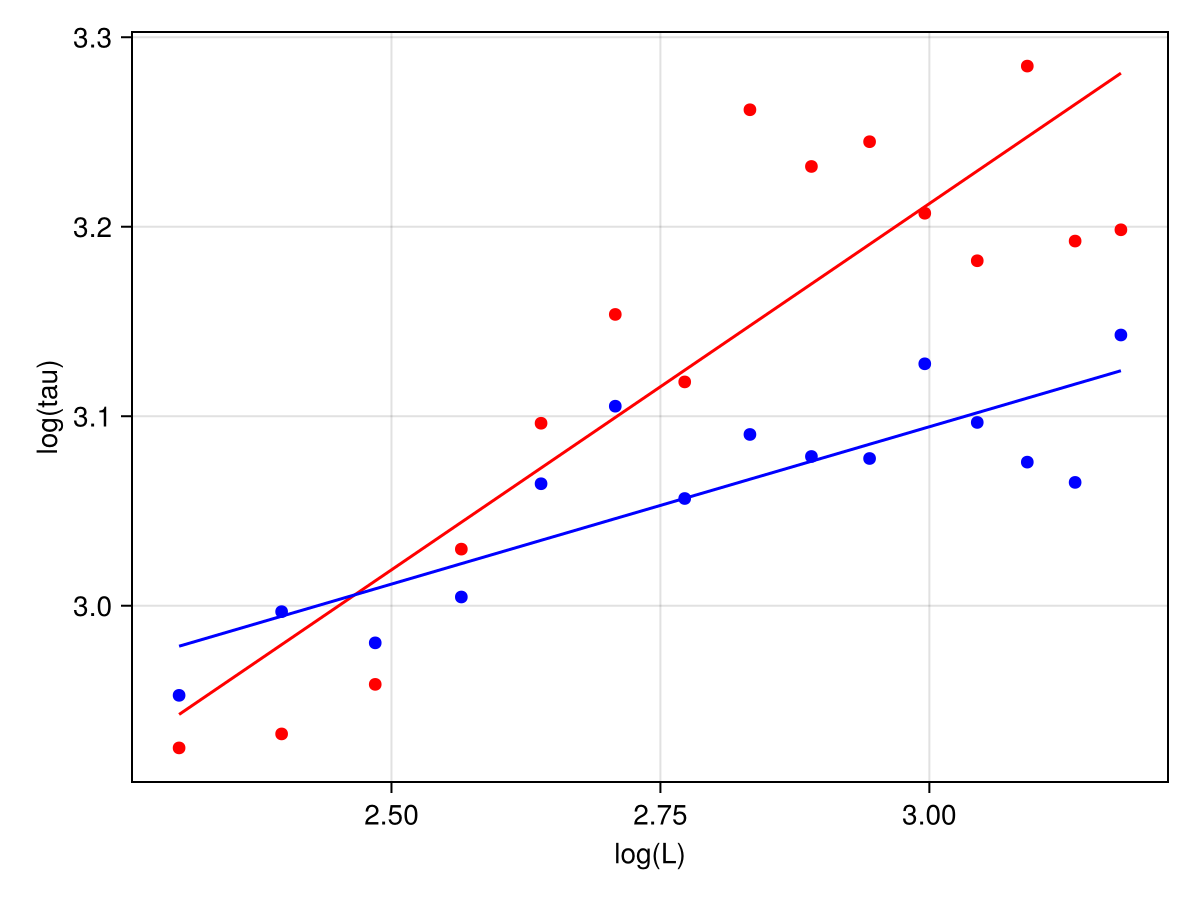

In [15]:
linfit(x,p)= (p[1] * x ) .+ p[2]

p0 = [8.0, 0.0]

x = log.(grid_sizes)
# y = mean([m_times, w_times])
m_fit = lsq.curve_fit(linfit, x, log.(m_times), p0)
w_fit = lsq.curve_fit(linfit, x, log.(w_times), p0)
println(m_fit.param)
println(w_fit.param)

fig = cm.Figure()
ax = cm.Axis(fig[1, 1], xlabel="log(L)", ylabel="log(tau)")
cm.plot!(ax, x, log.(m_times), color=:red, label="Metropolis")
cm.lines!(ax, x, linfit(x, m_fit.param), color=:red)
cm.plot!(ax, x, log.(w_times), color=:blue, label="Wolff")
cm.lines!(ax, x, linfit(x, w_fit.param), color=:blue)
fig